In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def corner_rsd(input_img_rsd, b_size = 9, k_size=3, alpha = 0.04):
    # inputs: 
    # input_img_rsd: input grayscale image
    # b_size: block_size for Gaussian filter
    # k_size: k_size for sobel i.e. sobel window size
    # alpha: constant in R 
    # for a grayscale image finds harris corner
    if input_img_rsd.ndim == 3:
        input_img_rsd = cv2.cvtColor(input_img_rsd, cv2.COLOR_BGR2GRAY)
    h, w = input_img_rsd.shape[0],input_img_rsd.shape[1]
            
    # derivatives using sobel operator
    der_x = cv2.Sobel(input_img_rsd,cv2.CV_64F,1,0,ksize=k_size)
    der_y = cv2.Sobel(input_img_rsd,cv2.CV_64F,0,1,ksize=k_size)

    # 2nd moment matrix generation
    Ixx = der_x*der_x
    Ixy = der_x*der_y
    Iyy = der_y*der_y
            
    # gaussian kernel size is given by ip b_size

    # Moment matrix M = summation of W(x,y)[[Ix^2 ,IxIy],[IxIy,Iy^2]]
    Ixx = cv2.GaussianBlur(Ixx,(b_size,b_size),0)
    Ixy = cv2.GaussianBlur(Ixy,(b_size,b_size),0)
    Iyy = cv2.GaussianBlur(Iyy,(b_size,b_size),0)
    # r matrix
    r_mat = np.zeros([h,w],dtype=float)
    for i in range(0,h):
        for j in range(0,w):
            M = [[Ixx[i,j],Ixy[i,j]],[Ixy[i,j],Iyy[i,j]]]

            r_mat[i][j] = np.linalg.det(M) - alpha*(np.trace(M)**2)
            # threshold = 10% Rmax
    threshold= 0.01*np.max(r_mat) 
    new_img = input_img_rsd.copy()
    new_img=cv2.cvtColor(new_img, cv2.COLOR_GRAY2RGB)
    for i in range(0,len(r_mat)):
        for j in range(0,len(r_mat[0])):
            if r_mat[i,j] >= threshold:
                cv2.circle(new_img,(j,i),1,(255,255,0),-1)

      
    corners_rsd = []
    for i in range(h):
        for j in range(w):
            if r_mat[i][j] >= threshold:
                corners_rsd.append([i,j]) 
            # returns list with corners coordinates
    return corners_rsd, new_img

In [10]:
img1 = cv2.imread("Lena.png")

coordinates, op = corner_rsd(img1)
print(coordinates)

[[2, 508], [2, 509], [2, 510], [2, 511], [3, 505], [3, 506], [3, 507], [3, 508], [3, 509], [3, 510], [3, 511], [4, 504], [4, 505], [4, 506], [4, 507], [4, 508], [4, 509], [4, 510], [4, 511], [5, 504], [5, 505], [5, 506], [5, 510], [5, 511], [6, 504], [6, 505], [54, 453], [54, 454], [54, 455], [55, 453], [55, 454], [55, 455], [55, 456], [56, 452], [56, 453], [56, 454], [56, 455], [56, 456], [56, 457], [57, 452], [57, 453], [57, 454], [57, 455], [57, 456], [57, 457], [58, 451], [58, 452], [58, 453], [58, 454], [58, 455], [58, 456], [59, 451], [59, 452], [59, 453], [59, 454], [59, 455], [60, 164], [60, 165], [60, 451], [60, 452], [60, 453], [60, 454], [61, 164], [61, 452], [62, 158], [62, 159], [62, 160], [62, 161], [63, 158], [63, 159], [63, 160], [63, 161], [63, 162], [64, 157], [64, 158], [64, 159], [64, 160], [64, 161], [64, 162], [65, 156], [65, 157], [65, 158], [65, 159], [65, 160], [65, 161], [65, 162], [66, 155], [66, 156], [66, 157], [66, 158], [66, 159], [66, 160], [66, 161], [6

Text(0.5, 1.0, 'cv2_Harris_corner')

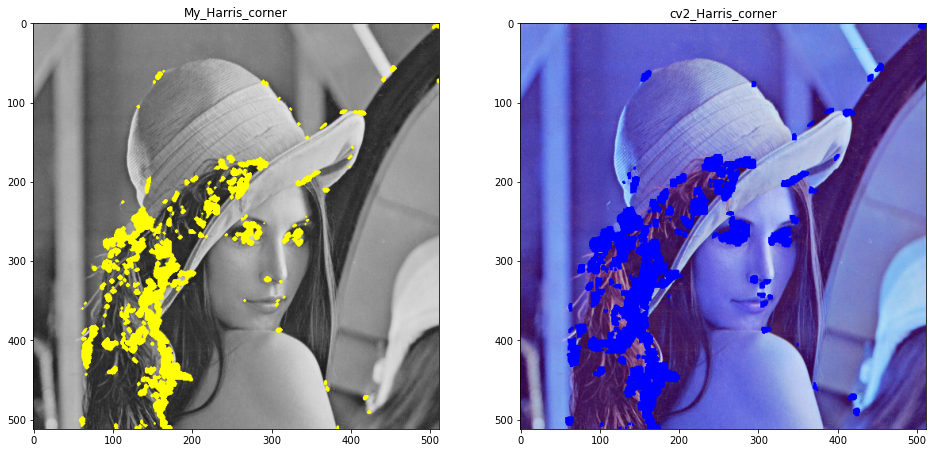

In [27]:
h, w = img1.shape[0],img1.shape[1]

plt.figure(figsize=(16,12))
plt.subplot(1,2,1)
plt.imshow(op)

plt.title('My_Harris_corner')
#cv2 inbuilt harris corner detector

X = cv2.imread("Lena.png")
X1 = cv2.cvtColor(X, cv2.COLOR_BGR2GRAY)
X1 = np.float32(X1)

dst = cv2.cornerHarris(X1,9,3,0.08)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
X[dst>0.01*dst.max()]=[0,0,255]

plt.subplot(1,2,2)
plt.imshow(X)
plt.title('cv2_Harris_corner')